In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50
plt.style.use('fivethirtyeight')

### Data Cleaning

In [2]:
loans_2007 = pd.read_csv('LoanStats3a.csv', skiprows=1)
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count, axis=1)
loans_2007 = loans_2007.drop(['desc'],axis=1)
loans_2007.to_csv('loans_2007.csv', index=False)

loans_2007['int_rate'] = loans_2007['int_rate'].str.replace('%','').astype('float')

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Visualizations

In [3]:
loans_2007.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Feb-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017,67.30,Jan-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


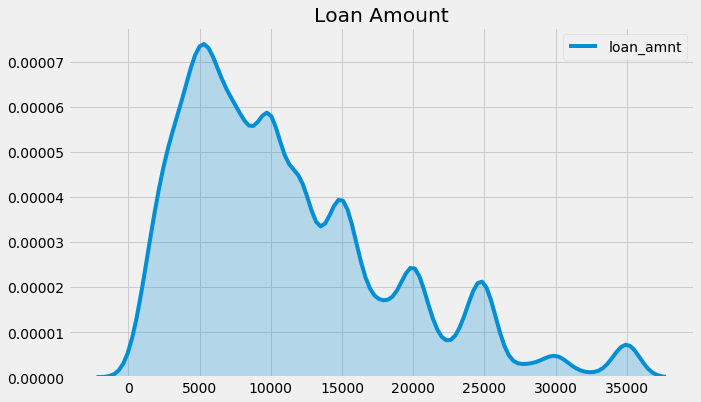

In [4]:
fig,ax = plt.subplots(figsize = (10,6))
sns.kdeplot(loans_2007['loan_amnt'].dropna(),shade = 'True')
plt.title('Loan Amount')
plt.show()

## A lot of pivots

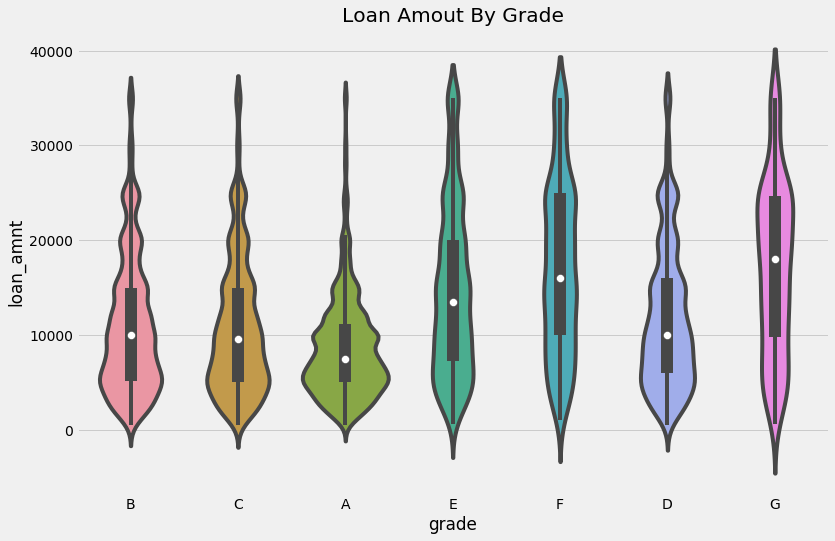

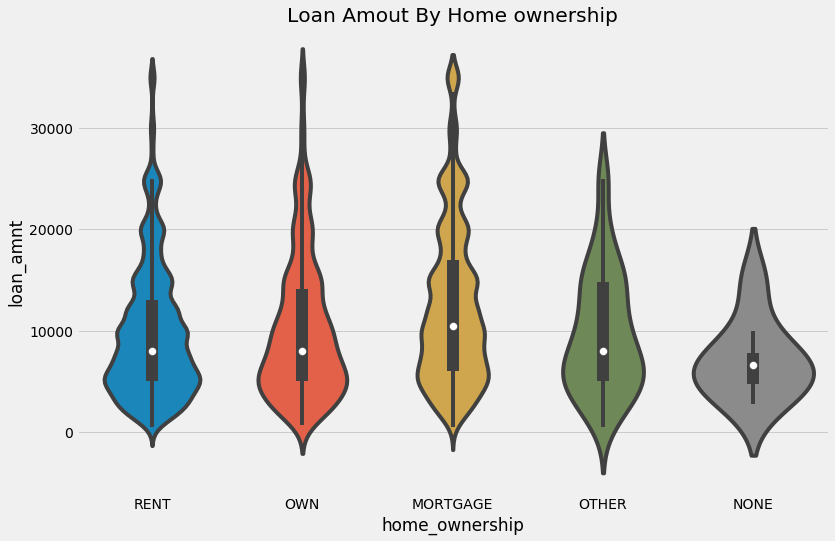

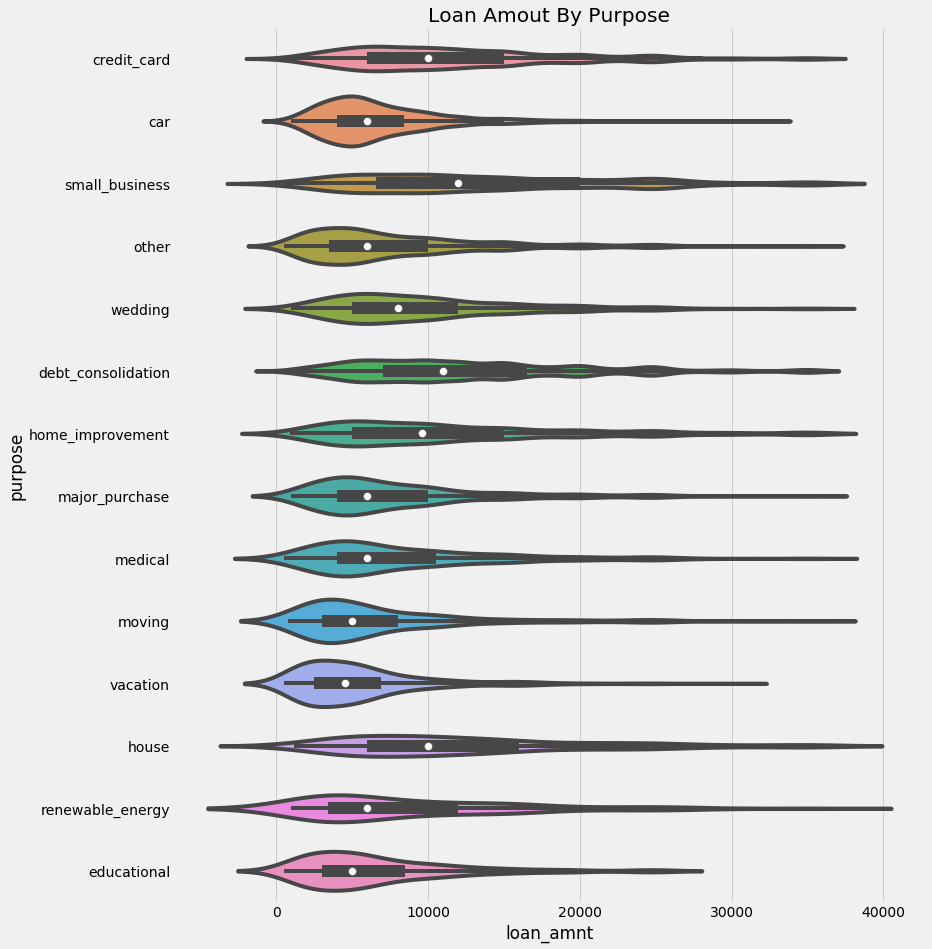

In [5]:
fig,ax = plt.subplots(figsize = (12,8))
ax = sns.violinplot(x="grade", y="loan_amnt", data=loans_2007)
plt.title('Loan Amout By Grade')
plt.show()

fig,ax = plt.subplots(figsize = (12,8))
ax = sns.violinplot(x="home_ownership", y="loan_amnt", data=loans_2007)
plt.title('Loan Amout By Home ownership')
plt.show()

fig,ax = plt.subplots(figsize = (12,15))
ax = sns.violinplot(y="purpose", x="loan_amnt", data=loans_2007)
plt.title('Loan Amout By Purpose')
plt.show()

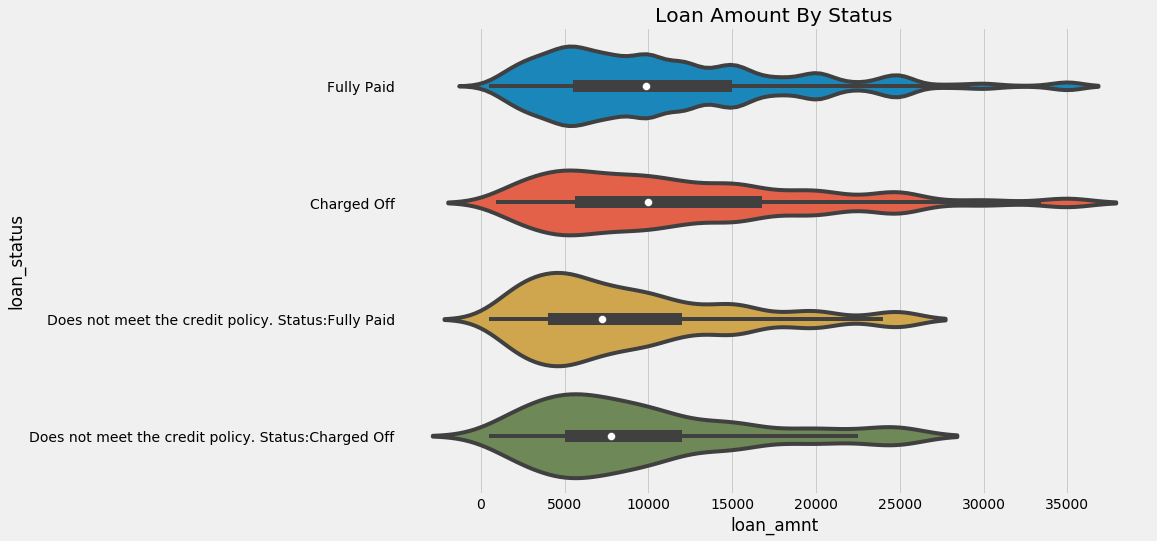

In [138]:
fig,ax = plt.subplots(figsize = (12,8))
ax = sns.violinplot(y="loan_status", x="loan_amnt", data=loans_2007)
plt.title('Loan Amount By Status')
plt.show()

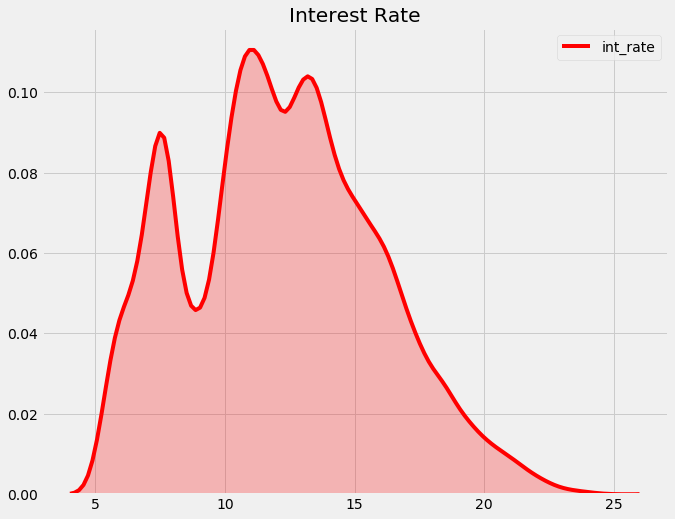

In [7]:
fig,ax = plt.subplots(figsize = (10,8))
sns.kdeplot(loans_2007['int_rate'].dropna(),shade = True,color = 'r')
plt.title('Interest Rate')
plt.show()

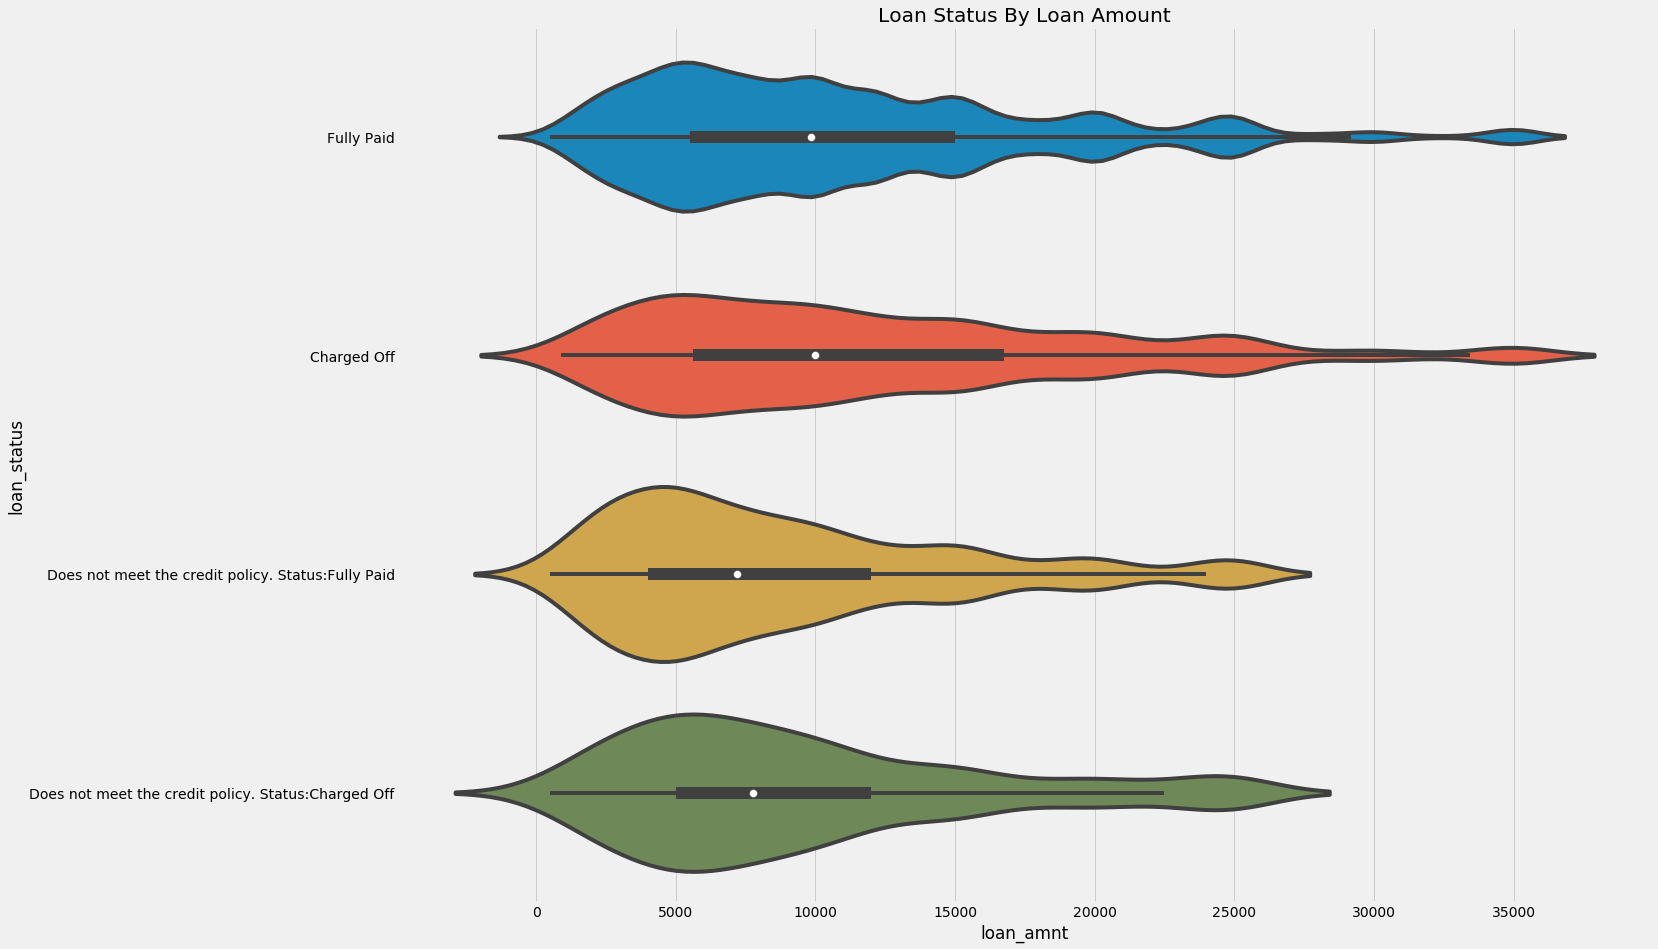

In [8]:
fig,ax = plt.subplots(figsize = (20,15))
ax = sns.violinplot(x="loan_amnt", y="loan_status", data=loans_2007)
plt.title('Loan Status By Loan Amount')
plt.show()

### Extracting features

In [95]:
# drop unnecessary columns
df = loans_2007.drop(['funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title',\
                      'issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
                      'total_rec_prncp',"total_rec_int", "total_rec_late_fee", "recoveries", \
                      "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"],axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Feb-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,Source Verified,Fully Paid,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Jan-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [96]:
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [97]:
# replace target column with binary values
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off') ]

map_dic = {
    'loan_status':{
        'Charged Off':0,
        'Fully Paid':1
    
    }
}

df = df.replace(map_dic)

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Feb-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,Source Verified,1,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Jan-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [99]:
# drop columns that contains only one unique value
drop_col_list = list()
for col in df.columns:
    if len(df[col].dropna().unique()) == 1:
        drop_col_list.append(col)
print("These columns are dropped because of having only 1 unique value")
print(drop_col_list)
df.drop(drop_col_list,axis = 1,inplace = True)

These columns are dropped because of having only 1 unique value
['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'hardship_flag', 'disbursement_method']


In [100]:
# deal with null values
print('*******NUll_COUNTS*******')
null_count = df.isnull().sum()
null_count

*******NUll_COUNTS*******


loan_amnt                 0
term                      0
int_rate                  0
installment               0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                    10
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    697
debt_settlement_flag      0
dtype: int64

`Since only 1 column pub_rec_bankruptcies contains 697 null values, remove the entire column`
`For other columns containing less than 50 null values, remove the rows`

In [101]:
df = df.drop('pub_rec_bankruptcies',axis = 1)
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      0
debt_settlement_flag    0
dtype: int64

In [102]:
object_df = df.select_dtypes(include = ['object'])
object_cols = object_df.columns
object_df.head()

,term,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d,debt_settlement_flag
0,36 months,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Feb-2018,N
1,60 months,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Oct-2016,N
2,36 months,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2017,N
3,36 months,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016,N
4,60 months,1 year,RENT,Source Verified,other,Personal,OR,Jan-1996,53.9%,Jan-2017,N


### Feature Engineering

In [104]:
cats = ['term','home_ownership','purpose','verification_status']
num = ['int_rate','revol_util']
num = ['revol_util']
map_dic_emp = {
    'emp_length':{
    '10+ years':10,
    '< 1 year':0,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '1 year':1,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    'n/a':0  
    }
}

# convert to numerical columns
for col in num:
    df[col] = df[col].str.rstrip('%').astype('float')

df = df.replace(map_dic_emp)

# drop columns    
df.drop([ 'title', 'addr_state', 'earliest_cr_line','last_credit_pull_d', 'debt_settlement_flag'],\
           axis = 1,inplace = True)

df = pd.concat([df,pd.get_dummies(df[cats])],axis = 1)
df.drop(cats,axis = 1,inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39724 entries, 0 to 39785
Data columns (total 38 columns):
loan_amnt                              39724 non-null float64
int_rate                               39724 non-null float64
installment                            39724 non-null float64
emp_length                             39724 non-null int64
annual_inc                             39724 non-null float64
loan_status                            39724 non-null int64
dti                                    39724 non-null float64
delinq_2yrs                            39724 non-null float64
inq_last_6mths                         39724 non-null float64
open_acc                               39724 non-null float64
pub_rec                                39724 non-null float64
revol_bal                              39724 non-null float64
revol_util                             39724 non-null float64
total_acc                              39724 non-null float64
term_ 36 months            

In [109]:
df['loan_status'].value_counts()

1    34073
0     5651
Name: loan_status, dtype: int64

This is a super unbalanced dataset as the positive labels are 6 times as much as negative labels, which means predicting the observations all positive will result in an accuracy score 86%

In [145]:
features = df.drop('loan_status',axis = 1)
target = df['loan_status']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test= \
train_test_split(features,target,test_size = .2,random_state = 1,shuffle = True,stratify = target)

penalty_lr = {0:10,1:1}
lr = LogisticRegression(class_weight= penalty_lr )
lr.fit(features_train,labels_train)
predictions = lr.predict(features_test)

print('roc_auc_score: {}'.format(roc_auc_score(labels_test,predictions)))
print('accuracy score: {}'.format(accuracy_score(labels_test,predictions)))

random_guess = (labels_test.shape[0] - labels_test[labels_test == 0].shape[0]) / labels_test.shape[0]
print('Base estimator score: {}'.format(random_guess))

tp_filter = (predictions ==1) & (labels_test ==1)
tn_filter = (predictions ==0) & (labels_test ==0)
fp_filter = (predictions ==1) & (labels_test ==0)
fn_filter = (predictions ==0) & (labels_test ==1)

tp = predictions[tp_filter].shape[0]
tn = predictions[tn_filter].shape[0]
fp = predictions[fp_filter].shape[0]
fn = predictions[fn_filter].shape[0]

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)

print('tpr {}, fpr {}, tnr {}, fnr {}'.format(tpr,fpr,tnr,fnr))

roc_auc_score: 0.5827810205234419
accuracy score: 0.339332913782253
Base estimator score: 0.8577721837633732
tpr 0.2425531914893617, fpr 0.07699115044247788, tnr 0.9230088495575222, fnr 0.7574468085106383


In [152]:
penalty_rf = {0:100,1:1}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1,class_weight= penalty,n_estimators= 10 )
rf.fit(features_train,labels_train)
predictions = rf.predict(features_test)

print('roc_auc_score: {}'.format(roc_auc_score(labels_test,predictions)))
print('accuracy score: {}'.format(accuracy_score(labels_test,predictions)))

random_guess = (labels_test.shape[0] - labels_test[labels_test == 0].shape[0]) / labels_test.shape[0]
print('Base estimator score: {}'.format(random_guess))

tp_filter = (predictions ==1) & (labels_test ==1)
tn_filter = (predictions ==0) & (labels_test ==0)
fp_filter = (predictions ==1) & (labels_test ==0)
fn_filter = (predictions ==0) & (labels_test ==1)

tp = predictions[tp_filter].shape[0]
tn = predictions[tn_filter].shape[0]
fp = predictions[fp_filter].shape[0]
fn = predictions[fn_filter].shape[0]

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)

print('tpr {}, fpr {}, tnr {}, fnr {}'.format(tpr,fpr,tnr,fnr))

roc_auc_score: 0.5109697504853298
accuracy score: 0.8455632473253618
Base estimator score: 0.8577721837633732
tpr 0.9785766691122524, fpr 0.9566371681415929, tnr 0.04336283185840708, fnr 0.021423330887747616


逻辑回归 及 随机森林 算法结果 <br>
在模型筛选出的 24.2% 的标的中进行选择投资，投到坏账的概率为7.7%。 <br>
若进行随机投资，投中坏账的概率为16.6%，应用此模型，将投资风险降低了53.6% <br>
随机森林 / 决策树算法对此类问题准确率较差，即使使用了更高的模型惩罚，模型仍无法应用 <br>

In [170]:
penalty_rf = {0:10,1:1}
from sklearn.svm import SVC

sub = df
sub = (sub - sub.min()) / (sub.max() - sub.min())
features = sub.drop('loan_status',axis = 1)
target = sub['loan_status']

features_train, features_test, labels_train, labels_test= \
train_test_split(features,target,test_size = .2,random_state = 1,shuffle = True,stratify = target)

svm = SVC(C=1.0, cache_size=200, class_weight=penalty_rf, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svm.fit(features_train,labels_train)
predictions = svm.predict(features_test)

print('roc_auc_score: {}'.format(roc_auc_score(labels_test,predictions)))
print('accuracy score: {}'.format(accuracy_score(labels_test,predictions)))

random_guess = (labels_test.shape[0] - labels_test[labels_test == 0].shape[0]) / labels_test.shape[0]
print('Base estimator score: {}'.format(random_guess))

tp_filter = (predictions ==1) & (labels_test ==1)
tn_filter = (predictions ==0) & (labels_test ==0)
fp_filter = (predictions ==1) & (labels_test ==0)
fn_filter = (predictions ==0) & (labels_test ==1)

tp = predictions[tp_filter].shape[0]
tn = predictions[tn_filter].shape[0]
fp = predictions[fp_filter].shape[0]
fn = predictions[fn_filter].shape[0]

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)

print('tpr {}, fpr {}, tnr {}, fnr {}'.format(tpr,fpr,tnr,fnr))

roc_auc_score: 0.5989595439523696
accuracy score: 0.3974826935179358
Base estimator score: 0.8577721837633732
tpr 0.3173881144534116, fpr 0.11946902654867257, tnr 0.8805309734513275, fnr 0.6826118855465884
